In [1]:
import numpy as np
import matplotlib.pyplot as plt
from salishsea_tools import viz_tools, places, visualisations
import netCDF4 as nc # unless you prefer xarray
import datetime as dt
import os
import glob
import cmocean

from IPython.display import Markdown, display
%matplotlib inline

In [2]:
x=np.arange(0,10) # create a numpy array containing the numbers 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
print('x:',x)
y=x[4:8]  # put the 4-indexed (4) through 7-indexed (7) elements in y
print('y:',y)
print('last element:', x[-1])
print('all of x:',x[:])

x: [0 1 2 3 4 5 6 7 8 9]
y: [4 5 6 7]
last element: 9
all of x: [0 1 2 3 4 5 6 7 8 9]


In [3]:
places.PLACES['S3']

{'lon lat': (-123.558, 49.125),
 'NEMO grid ji': (450, 258),
 'GEM2.5 grid ji': (138, 144)}

### Load a file from the 201905 hindcast

In [15]:
f=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_feb_climate_2007_2019_dia2_T.nc')

In [16]:
f1=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_mar_climate_2007_2019_dia2_T.nc')

In [17]:
f2=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_apr_climate_2007_2019_dia2_T.nc')

In [18]:
f3=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_may_climate_2007_2019_dia2_T.nc')

In [19]:
f4=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_jun_climate_2007_2019_dia2_T.nc')

In [20]:
f5=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_jul_climate_2007_2019_dia2_T.nc')

In [21]:
f6=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_aug_climate_2007_2019_dia2_T.nc')

In [22]:
f7=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_sep_climate_2007_2019_dia2_T.nc')

In [23]:
f8=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_oct_climate_2007_2019_dia2_T.nc')

In [24]:
print(f.variables.keys())

dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'deptht', 'deptht_bounds', 'HetMRub', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'MORTPHY', 'MORTMRUB', 'MORTDIAT', 'GRMESZDIAT', 'GRMESZMRUB', 'GRMESZPHY', 'GRMESZPON', 'GRMESZMICZ', 'GRMICZDIAT', 'GRMICZMRUB', 'GRMICZPHY', 'GRMICZPON', 'GRMICZMICZ'])


In [25]:
# return times as datetime objects:
torig=dt.datetime.strptime(f.variables['time_centered'].time_origin,'%Y-%m-%d %H:%M:%S')
print(torig)
times=np.array([torig + dt.timedelta(seconds=ii) for ii in f.variables['time_centered'][:]])

1900-01-01 00:00:00


In [26]:
# load model mesh
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc') as fm:
    print(fm.variables.keys())
    tmask=fm.variables['tmask'][:,:,:,:]
    navlon=fm.variables['nav_lon'][:,:]
    navlat=fm.variables['nav_lat'][:,:]

dict_keys(['nav_lon', 'nav_lat', 'time_counter', 'tmask', 'umask', 'vmask', 'fmask', 'tmaskutil', 'umaskutil', 'vmaskutil', 'fmaskutil', 'glamt', 'glamu', 'glamv', 'glamf', 'gphit', 'gphiu', 'gphiv', 'gphif', 'e1t', 'e1u', 'e1v', 'e1f', 'e2t', 'e2u', 'e2v', 'e2f', 'ff', 'mbathy', 'misf', 'isfdraft', 'e3t_0', 'e3u_0', 'e3v_0', 'e3w_0', 'gdept_0', 'gdepu', 'gdepv', 'gdepw_0', 'gdept_1d', 'gdepw_1d', 'e3t_1d', 'e3w_1d'])


### Surface plots - Aerial view

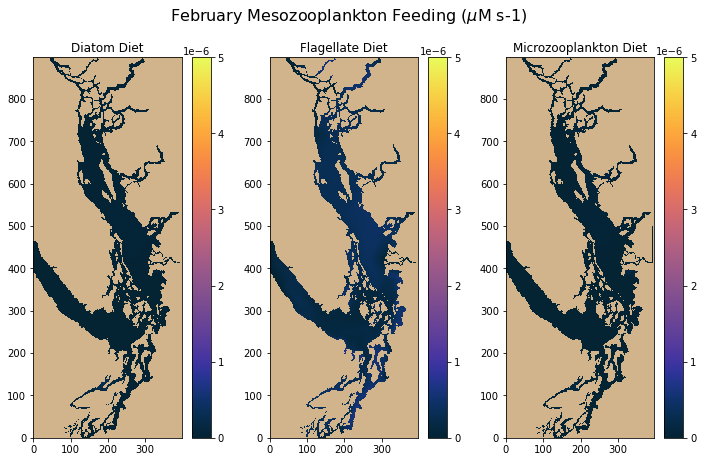

In [27]:
# with pcolormesh: no smoothing
cmap0=cmocean.cm.thermal
cmap0.set_bad('tan')

#cmap1=cmocean.cm.haline
#cmap1.set_bad('k')
il=0
fig,ax=plt.subplots(1,3,figsize=(12,7))
fig.suptitle('February Mesozooplankton Feeding ($\mu$M s-1)', fontsize=16)
m0=ax[0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f.variables['GRMESZDIAT'][il,0,:,:]),cmap=cmap0,vmin=0,vmax=0.000005)
viz_tools.set_aspect(ax[0],coords='grid')
ax[0].set_title('Diatom Diet')
fig.colorbar(m0,ax=ax[0])

m0=ax[1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f.variables['GRMESZPHY'][il,0,:,:]),cmap=cmap0,vmin=0,vmax=0.000005)
viz_tools.set_aspect(ax[1],coords='grid')
ax[1].set_title('Flagellate Diet')
fig.colorbar(m0,ax=ax[1])

m0=ax[2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f.variables['GRMESZMICZ'][il,0,:,:]),cmap=cmap0,vmin=0,vmax=0.000005)
viz_tools.set_aspect(ax[2],coords='grid')
ax[2].set_title('Microzooplankton Diet')
fig.colorbar(m0,ax=ax[2])

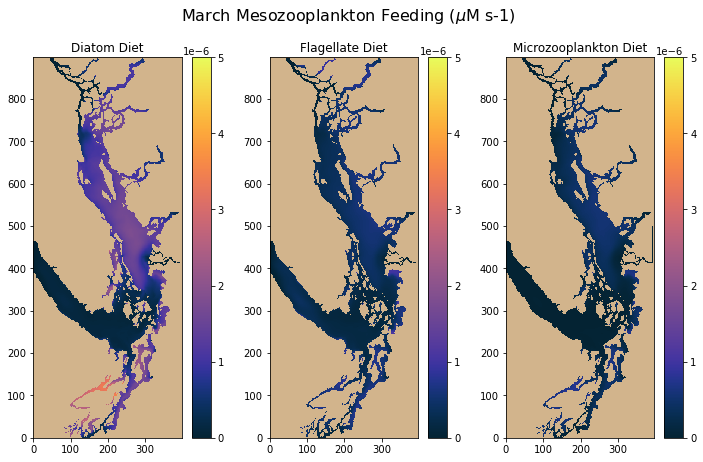

In [28]:
# with pcolormesh: no smoothing
cmap0=cmocean.cm.thermal
cmap0.set_bad('tan')

#cmap1=cmocean.cm.haline
#cmap1.set_bad('k')
il=0
fig,ax=plt.subplots(1,3,figsize=(12,7))
fig.suptitle('March Mesozooplankton Feeding ($\mu$M s-1)', fontsize=16)
m0=ax[0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f1.variables['GRMESZDIAT'][il,0,:,:]),cmap=cmap0,vmin=0,vmax=0.000005)
viz_tools.set_aspect(ax[0],coords='grid')
ax[0].set_title('Diatom Diet')
fig.colorbar(m0,ax=ax[0])

m0=ax[1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f1.variables['GRMESZPHY'][il,0,:,:]),cmap=cmap0,vmin=0,vmax=0.000005)
viz_tools.set_aspect(ax[1],coords='grid')
ax[1].set_title('Flagellate Diet')
fig.colorbar(m0,ax=ax[1])

m0=ax[2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f1.variables['GRMESZMICZ'][il,0,:,:]),cmap=cmap0,vmin=0,vmax=0.000005)
viz_tools.set_aspect(ax[2],coords='grid')
ax[2].set_title('Microzooplankton Diet')
fig.colorbar(m0,ax=ax[2])

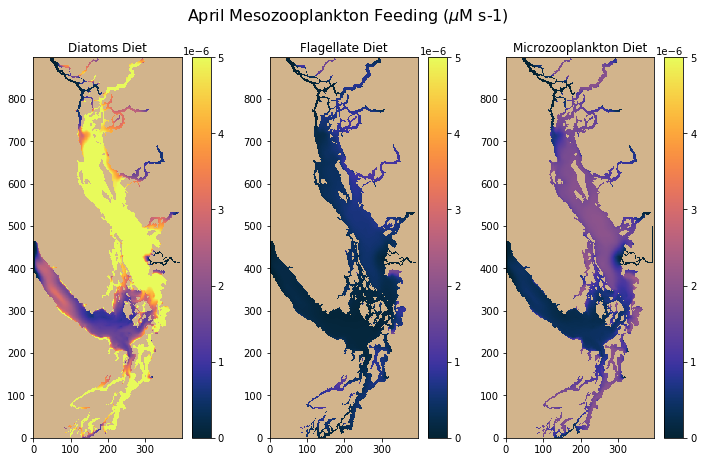

In [29]:
# with pcolormesh: no smoothing
cmap0=cmocean.cm.thermal
cmap0.set_bad('tan')
cmap1=cmocean.cm.haline
cmap1.set_bad('k')
il=0
fig,ax=plt.subplots(1,3,figsize=(12,7))
fig.suptitle('April Mesozooplankton Feeding ($\mu$M s-1)', fontsize=16)
m0=ax[0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f2.variables['GRMESZDIAT'][il,0,:,:]),cmap=cmap0,vmin=0,vmax=0.000005)
viz_tools.set_aspect(ax[0],coords='grid')
ax[0].set_title('Diatoms Diet')
fig.colorbar(m0,ax=ax[0])

m0=ax[1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f2.variables['GRMESZPHY'][il,0,:,:]),cmap=cmap0,vmin=0,vmax=0.000005)
viz_tools.set_aspect(ax[1],coords='grid')
ax[1].set_title('Flagellate Diet')
fig.colorbar(m0,ax=ax[1])

m0=ax[2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f2.variables['GRMESZMICZ'][il,0,:,:]),cmap=cmap0,vmin=0,vmax=0.000005)
viz_tools.set_aspect(ax[2],coords='grid')
ax[2].set_title('Microzooplankton Diet')
fig.colorbar(m0,ax=ax[2])

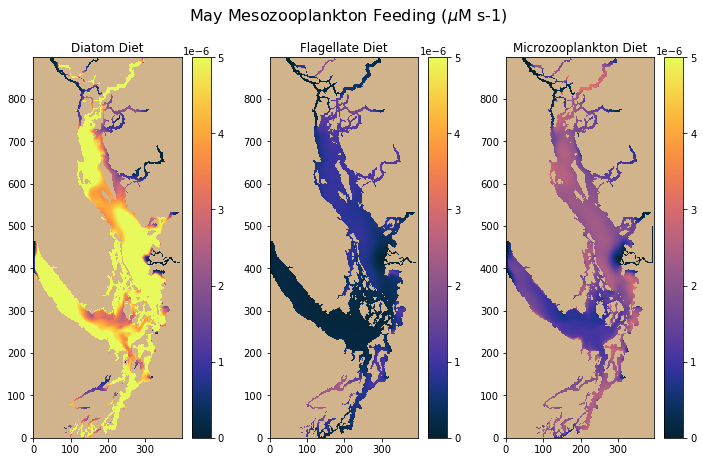

In [30]:
# with pcolormesh: no smoothing
cmap0=cmocean.cm.thermal
cmap0.set_bad('tan')
cmap1=cmocean.cm.haline
cmap1.set_bad('k')
il=0
fig,ax=plt.subplots(1,3,figsize=(12,7))
fig.suptitle('May Mesozooplankton Feeding ($\mu$M s-1)', fontsize=16)
m0=ax[0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f3.variables['GRMESZDIAT'][il,0,:,:]),cmap=cmap0,vmin=0,vmax=0.000005)
viz_tools.set_aspect(ax[0],coords='grid')
ax[0].set_title('Diatom Diet')
fig.colorbar(m0,ax=ax[0])

m0=ax[1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f3.variables['GRMESZPHY'][il,0,:,:]),cmap=cmap0,vmin=0,vmax=0.000005)
viz_tools.set_aspect(ax[1],coords='grid')
ax[1].set_title('Flagellate Diet')
fig.colorbar(m0,ax=ax[1])

m0=ax[2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f3.variables['GRMESZMICZ'][il,0,:,:]),cmap=cmap0,vmin=0,vmax=0.000005)
viz_tools.set_aspect(ax[2],coords='grid')
ax[2].set_title('Microzooplankton Diet')
fig.colorbar(m0,ax=ax[2])


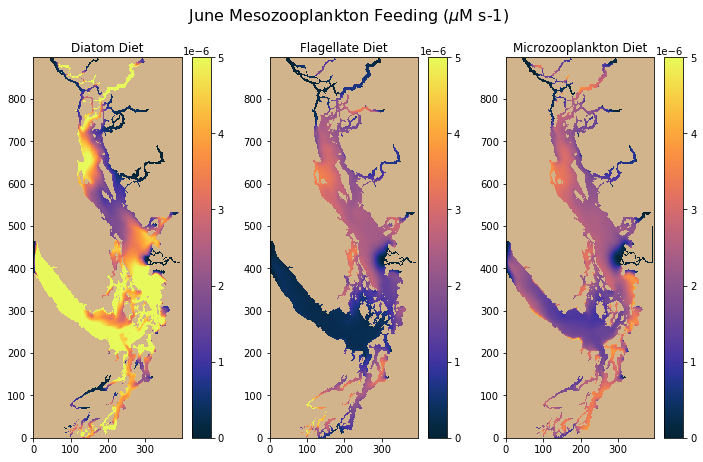

In [31]:
# with pcolormesh: no smoothing
cmap0=cmocean.cm.thermal
cmap0.set_bad('tan')
cmap1=cmocean.cm.haline
cmap1.set_bad('k')
il=0
fig,ax=plt.subplots(1,3,figsize=(12,7))
fig.suptitle('June Mesozooplankton Feeding ($\mu$M s-1)', fontsize=16)
m0=ax[0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f4.variables['GRMESZDIAT'][il,0,:,:]),cmap=cmap0,vmin=0,vmax=0.000005)
viz_tools.set_aspect(ax[0],coords='grid')
ax[0].set_title('Diatom Diet')
fig.colorbar(m0,ax=ax[0])

m0=ax[1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f4.variables['GRMESZPHY'][il,0,:,:]),cmap=cmap0,vmin=0,vmax=0.000005)
viz_tools.set_aspect(ax[1],coords='grid')
ax[1].set_title('Flagellate Diet')
fig.colorbar(m0,ax=ax[1])

m0=ax[2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f4.variables['GRMESZMICZ'][il,0,:,:]),cmap=cmap0,vmin=0,vmax=0.000005)
viz_tools.set_aspect(ax[2],coords='grid')
ax[2].set_title('Microzooplankton Diet')
fig.colorbar(m0,ax=ax[2])

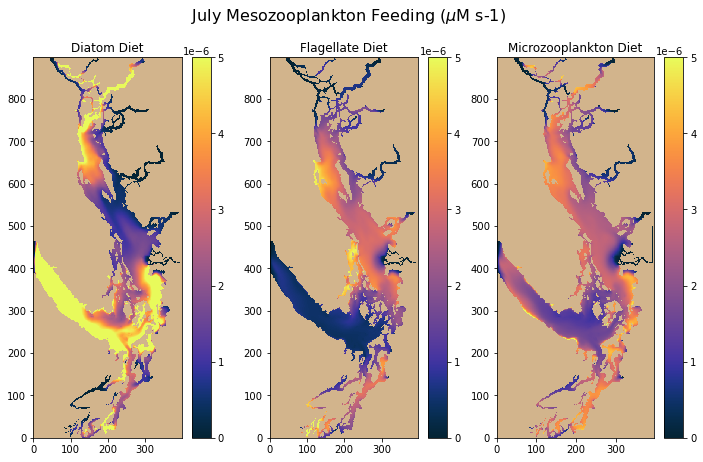

In [32]:
# with pcolormesh: no smoothing
cmap0=cmocean.cm.thermal
cmap0.set_bad('tan')
cmap1=cmocean.cm.haline
cmap1.set_bad('k')
il=0
fig,ax=plt.subplots(1,3,figsize=(12,7))
fig.suptitle('July Mesozooplankton Feeding ($\mu$M s-1)', fontsize=16)
m0=ax[0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f5.variables['GRMESZDIAT'][il,0,:,:]),cmap=cmap0,vmin=0,vmax=0.000005)
viz_tools.set_aspect(ax[0],coords='grid')
ax[0].set_title('Diatom Diet')
fig.colorbar(m0,ax=ax[0])

m0=ax[1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f5.variables['GRMESZPHY'][il,0,:,:]),cmap=cmap0,vmin=0,vmax=0.000005)
viz_tools.set_aspect(ax[1],coords='grid')
ax[1].set_title('Flagellate Diet')
fig.colorbar(m0,ax=ax[1])

m0=ax[2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f5.variables['GRMESZMICZ'][il,0,:,:]),cmap=cmap0,vmin=0,vmax=0.000005)
viz_tools.set_aspect(ax[1],coords='grid')
ax[2].set_title('Microzooplankton Diet')
fig.colorbar(m0,ax=ax[2])

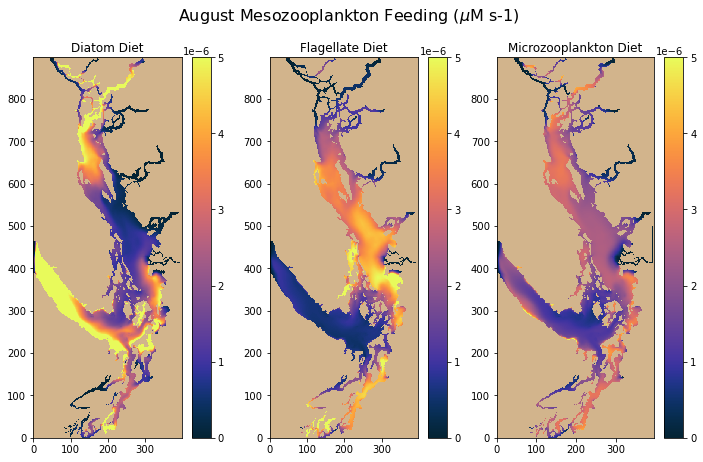

In [33]:
# with pcolormesh: no smoothing
cmap0=cmocean.cm.thermal
cmap0.set_bad('tan')
cmap1=cmocean.cm.haline
cmap1.set_bad('k')
il=0
fig,ax=plt.subplots(1,3,figsize=(12,7))
fig.suptitle('August Mesozooplankton Feeding ($\mu$M s-1)', fontsize=16)
m0=ax[0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f6.variables['GRMESZDIAT'][il,0,:,:]),cmap=cmap0,vmin=0,vmax=0.000005)
viz_tools.set_aspect(ax[0],coords='grid')
ax[0].set_title('Diatom Diet')
fig.colorbar(m0,ax=ax[0])

m0=ax[1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f6.variables['GRMESZPHY'][il,0,:,:]),cmap=cmap0,vmin=0,vmax=0.000005)
viz_tools.set_aspect(ax[1],coords='grid')
ax[1].set_title('Flagellate Diet')
fig.colorbar(m0,ax=ax[1])

m0=ax[2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f6.variables['GRMESZMICZ'][il,0,:,:]),cmap=cmap0,vmin=0,vmax=0.000005)
viz_tools.set_aspect(ax[1],coords='grid')
ax[2].set_title('Microzooplankton Diet')
fig.colorbar(m0,ax=ax[2])

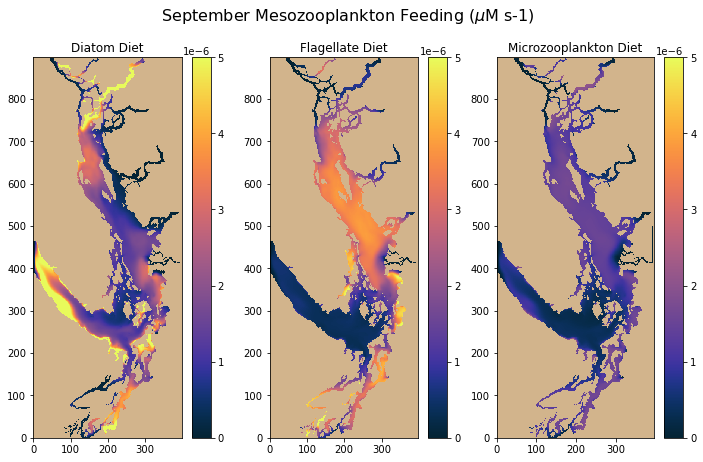

In [34]:
# with pcolormesh: no smoothing
cmap0=cmocean.cm.thermal
cmap0.set_bad('tan')
cmap1=cmocean.cm.haline
cmap1.set_bad('k')
il=0
fig,ax=plt.subplots(1,3,figsize=(12,7))
fig.suptitle('September Mesozooplankton Feeding ($\mu$M s-1)', fontsize=16)
m0=ax[0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f7.variables['GRMESZDIAT'][il,0,:,:]),cmap=cmap0,vmin=0,vmax=0.000005)
viz_tools.set_aspect(ax[0],coords='grid')
ax[0].set_title('Diatom Diet')
fig.colorbar(m0,ax=ax[0])

m0=ax[1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f7.variables['GRMESZPHY'][il,0,:,:]),cmap=cmap0,vmin=0,vmax=0.000005)
viz_tools.set_aspect(ax[1],coords='grid')
ax[1].set_title('Flagellate Diet')
fig.colorbar(m0,ax=ax[1])

m0=ax[2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f7.variables['GRMESZMICZ'][il,0,:,:]),cmap=cmap0,vmin=0,vmax=0.000005)
viz_tools.set_aspect(ax[1],coords='grid')
ax[2].set_title('Microzooplankton Diet')
fig.colorbar(m0,ax=ax[2])

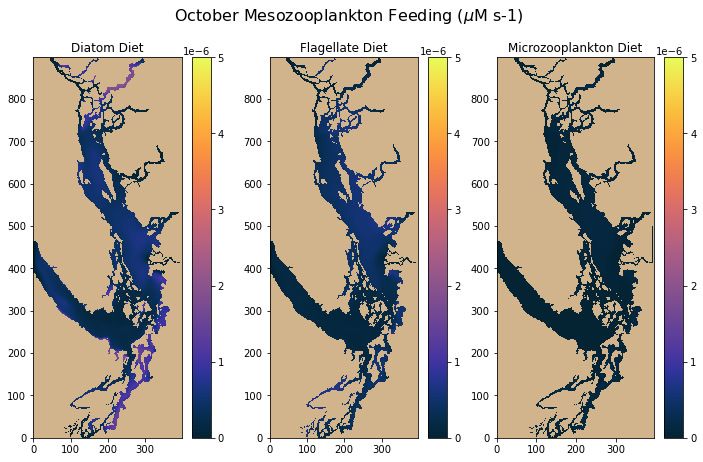

In [35]:
# with pcolormesh: no smoothing
cmap0=cmocean.cm.thermal
cmap0.set_bad('tan')
cmap1=cmocean.cm.haline
cmap1.set_bad('k')
il=0
fig,ax=plt.subplots(1,3,figsize=(12,7))
fig.suptitle('October Mesozooplankton Feeding ($\mu$M s-1)', fontsize=16)
m0=ax[0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f8.variables['GRMESZDIAT'][il,0,:,:]),cmap=cmap0,vmin=0,vmax=0.000005)
viz_tools.set_aspect(ax[0],coords='grid')
ax[0].set_title('Diatom Diet')
fig.colorbar(m0,ax=ax[0])

m0=ax[1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f8.variables['GRMESZPHY'][il,0,:,:]),cmap=cmap0,vmin=0,vmax=0.000005)
viz_tools.set_aspect(ax[1],coords='grid')
ax[1].set_title('Flagellate Diet')
fig.colorbar(m0,ax=ax[1])

m0=ax[2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f8.variables['GRMESZMICZ'][il,0,:,:]),cmap=cmap0,vmin=0,vmax=0.000005)
viz_tools.set_aspect(ax[1],coords='grid')
ax[2].set_title('Microzooplankton Diet')
fig.colorbar(m0,ax=ax[2])

In [37]:
#fbathy.close()
#fmesh.close()

In [38]:
f.close()
#fe3t.close()

In [39]:
f2.close()
#fe3t_2.close()

In [40]:
f3.close()
#fe3t_3.close()

In [41]:
f4.close()
#fe3t_4.close()

In [42]:
f5.close()
#fe3t_5.close()

In [43]:
f6.close()

In [44]:
f7.close()

In [45]:
f8.close()